# Project 3: Natural Language Processing of Subreddit Posts
------------------------------------------------------------

Project notebook organisation:
1. [Webscraping and Data Acquisition]()
2. **Exploratory Data Analysis and Preprocessing**(current notebook)
3. [Model Tuning and Insights]()

###  Contents:
  1. [Data Wrangling](#Data-Wrangling)
  2. [Exploratory Data Analysis](#Exploratory-Data-Analysis)

# Data Wrangling
### Data Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud, ImageColorGenerator

import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

 
import warnings
warnings.filterwarnings('ignore')
import re
%config InlineBackend.figure_format = 'retina'

# Enables Pandas to display all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Enables Pandas to display long strings properly
pd.options.display.max_colwidth = 100

In [2]:
# Importing Dataframe
df_investing = pd.read_csv('../data/investing_subs-pushshift.csv')
df_crypto = pd.read_csv('../data/cryptocurrency_subs-pushshift.csv')
df_investing.head()

,Unnamed: 0,subreddit,author,selftext,title,created_utc
0,0,investing,tradersunniez,[removed],TOP 10 Reasons Why ATER is a GREAT PLAY!! Squeeze!,1635172754
1,7,investing,auser24,"Let's say the FED starts rising rates to contain inflation at some point in the future, which wo...",Are there any asset classes from which one could expect positive real returns in a scenario of r...,1635087207
2,9,investing,[deleted],NaN,How to invest in s&amp;p500 and why its price is different in,1635090573
3,17,investing,honkballs,"As title says what is your stocks, bonds, property, cash, crypto, other (feel free to specify!) ...","What is the % split of your assets? Stocks, Bonds, Property, Cash, Crypto, Other?",1635097429
4,24,investing,Routine_Bill_2860,I have shares and otm calls for January but this is shaping up to be a disruptive company not ju...,$MMAT is set to be a very disruptive company. They have a lot going on that hasn't made headline...,1635104437


In [3]:
df_crypto.head()

,Unnamed: 0,subreddit,author,selftext,title,created_utc
0,0,CryptoCurrency,B1G092MLBOA,[removed],1grand to invest! What seems wise,1635172952
1,1,CryptoCurrency,BryanM_Crypto,NaN,"We’re proud to announce our partnership with Matt Damon and Water.org, bringing clean water to m...",1635172960
2,4,CryptoCurrency,TheTonik,I do not believe Binance Coin and Stable Coins should be included in this discussion. It just se...,Opinions on who will be the next to hit $100B Market Cap?,1635173044
3,5,CryptoCurrency,heggen,The german government is auctioning off confiscated Bitcoin. \n\nToday started in germany some...,People trust the goverment more and pay more to get BTC compared to exchanges,1635173046
4,6,CryptoCurrency,DragonStreamline,"For those interested in discovering new (potential) gems, how about this one. What if you could ...","Staking your crypto, then unlocking that staked amount, then restaking it for double the APY's. ...",1635173055


In [4]:
df_investing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1020 non-null   int64 
 1   subreddit    1020 non-null   object
 2   author       1020 non-null   object
 3   selftext     1019 non-null   object
 4   title        1020 non-null   object
 5   created_utc  1020 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 47.9+ KB


In [5]:
df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1034 non-null   int64 
 1   subreddit    1034 non-null   object
 2   author       1034 non-null   object
 3   selftext     1032 non-null   object
 4   title        1034 non-null   object
 5   created_utc  1034 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 48.6+ KB


## Additional Data Cleaning
### Removing entries that passed first filter during scraping

In [6]:
# Checking additional outliers in df_investing
unwanted_removed = df_investing.loc[df_investing ['selftext'] == "[removed]"]
unwanted_removed

,Unnamed: 0,subreddit,author,selftext,title,created_utc
0,0,investing,tradersunniez,[removed],TOP 10 Reasons Why ATER is a GREAT PLAY!! Squeeze!,1635172754


In [7]:
# Checking additional outliers in df_crypto
unwanted_remove = df_crypto.loc[df_crypto ['selftext'] == "[removed]"]
unwanted_remove

,Unnamed: 0,subreddit,author,selftext,title,created_utc
0,0,CryptoCurrency,B1G092MLBOA,[removed],1grand to invest! What seems wise,1635172952


In [8]:
# Double Checking additional [removed]
print('Additional [removed] in df_investing:',(df_investing['selftext']=='[removed]').sum())
print('Additional [removed] in df_crypto:',(df_crypto['selftext']=='[removed]').sum())

# Dropping row that has '[removed]' from both dataframes
df_investing.drop( df_investing[df_investing['selftext'] == '[removed]'].index , inplace=True)
df_crypto.drop( df_crypto[df_crypto['selftext'] == '[removed]'].index , inplace=True)

# Checking if removed successfully
print('Last check for [removed] in df_investing:',(df_investing['selftext']=='[removed]').sum())
print('Last check for [removed] in df_crypto:',(df_crypto['selftext']=='[removed]').sum())


Additional [removed] in df_investing: 1
Additional [removed] in df_crypto: 1
Last check for [removed] in df_investing: 0
Last check for [removed] in df_crypto: 0


In [9]:
unwanted_deleted = df_investing.loc[df_investing ['selftext'] == "[deleted]"]
unwanted_deleted

,Unnamed: 0,subreddit,author,selftext,title,created_utc
223,1823,investing,[deleted],[deleted],"BABA's revenue is 2x bigger, and gross profits are 6x bigger than AMZN's, yet its market cap is ...",1633544009


In [10]:
unwanted_deleted = df_crypto.loc[df_crypto ['selftext'] == "[deleted]"]
unwanted_deleted

,Unnamed: 0,subreddit,author,selftext,title,created_utc
75,256,CryptoCurrency,[deleted],[deleted],"Dogecoin might be the most wanted, but what it needs is THIS",1635002610


In [11]:
# Double Checking additional [deleted]
print('Additional [deleted] entries in df_investing:',(df_investing['selftext']=='[deleted]').sum())
print('Additional [deleted] entries in df_crypto:',(df_crypto['selftext']=='[deleted]').sum())

# Dropping row that has '[deleted]' from both dataframes
df_investing.drop( df_investing[df_investing['selftext'] == '[deleted]'].index , inplace=True)
df_crypto.drop( df_crypto[df_crypto['selftext'] == '[deleted]'].index , inplace=True)

# Checking if removed successfully
print('Last check for [deleted] entries in df_investing:',(df_investing['selftext']=='[deleted]').sum())
print('Last check for [deleted] entries df_crypto:',(df_crypto['selftext']=='[deleted]').sum())

Additional [deleted] entries in df_investing: 1
Additional [deleted] entries in df_crypto: 1
Last check for [deleted] entries in df_investing: 0
Last check for [deleted] entries df_crypto: 0


In [12]:
outlier = df_investing.loc[df_investing ['selftext'] == " "]
outlier

,Unnamed: 0,subreddit,author,selftext,title,created_utc


In [13]:
outlier = df_crypto.loc[df_crypto ['selftext'] == " "]
outlier

,Unnamed: 0,subreddit,author,selftext,title,created_utc


### Dropping unwanted columns

In [14]:
df_investing = df_investing.drop(columns=['Unnamed: 0'])
df_crypto = df_crypto.drop(columns=['Unnamed: 0'])

In [15]:
df_investing.reset_index(inplace=True, drop=True)
df_investing = df_investing.drop(columns='created_utc')
df_investing['subreddit'].value_counts()

investing    1018
Name: subreddit, dtype: int64

In [16]:
df_crypto.reset_index(inplace=True, drop=True)
df_crypto = df_crypto.drop(columns='created_utc')
df_crypto['subreddit'].value_counts()

CryptoCurrency    1032
Name: subreddit, dtype: int64

### Unable to concatenate due to null values

In [17]:
# Checking rows in df_investing for null value
df_investing[df_investing['selftext'].isnull()]

,subreddit,author,selftext,title
1,investing,[deleted],NaN,How to invest in s&amp;p500 and why its price is different in


In [18]:
# Dropping null value
df_investing.dropna(subset=['selftext'],inplace=True)

In [19]:
# Double checking if removed successfully
df_investing[df_investing['selftext'].isnull()]

,subreddit,author,selftext,title


In [20]:
# Checking rows in df_crypto for null value
df_crypto[df_crypto['selftext'].isnull()]

,subreddit,author,selftext,title
0,CryptoCurrency,BryanM_Crypto,NaN,"We’re proud to announce our partnership with Matt Damon and Water.org, bringing clean water to m..."
319,CryptoCurrency,[deleted],NaN,"To those who held on since May, thank you!"


In [21]:
# Dropping null value
df_crypto.dropna(subset=['selftext'],inplace=True)

In [22]:
# Double checking if removed successfully
df_crypto[df_crypto['selftext'].isnull()]

,subreddit,author,selftext,title


### Combining both dataframes

In [23]:
# Concatenate df_investing and df_crypto
df_combine = pd.concat(objs=[df_investing, df_crypto], axis=0)
df_combine.drop_duplicates(subset=['selftext'], inplace=True)
df_combine.reset_index(inplace=True, drop=True)
df_combine['subreddit'].value_counts()

CryptoCurrency    1029
investing         1017
Name: subreddit, dtype: int64

In [24]:
# Checking dataframe
df_combine.head()

,subreddit,author,selftext,title
0,investing,auser24,"Let's say the FED starts rising rates to contain inflation at some point in the future, which wo...",Are there any asset classes from which one could expect positive real returns in a scenario of r...
1,investing,honkballs,"As title says what is your stocks, bonds, property, cash, crypto, other (feel free to specify!) ...","What is the % split of your assets? Stocks, Bonds, Property, Cash, Crypto, Other?"
2,investing,Routine_Bill_2860,I have shares and otm calls for January but this is shaping up to be a disruptive company not ju...,$MMAT is set to be a very disruptive company. They have a lot going on that hasn't made headline...
3,investing,FearlessNL,# Companhia Siderúrgica Nacional S.A. Analysis (Ticker: SID)\n\n*An integrated steel company tha...,$SID - An integrated steel company that is criminally undervalued (169% upside)
4,investing,Alone-Pudding-9040,"I have about 1.5 mil that I want to invest into mostly technology stocks, (fidelity select techn...",Can I live off of technology stocks?


In [25]:
# Dummify subreddits into numerical value
df_combine['subreddit_investing'] = df_combine['subreddit'].map(lambda x: 1 if x == 'investing' else 0)
df_combine.head()

,subreddit,author,selftext,title,subreddit_investing
0,investing,auser24,"Let's say the FED starts rising rates to contain inflation at some point in the future, which wo...",Are there any asset classes from which one could expect positive real returns in a scenario of r...,1
1,investing,honkballs,"As title says what is your stocks, bonds, property, cash, crypto, other (feel free to specify!) ...","What is the % split of your assets? Stocks, Bonds, Property, Cash, Crypto, Other?",1
2,investing,Routine_Bill_2860,I have shares and otm calls for January but this is shaping up to be a disruptive company not ju...,$MMAT is set to be a very disruptive company. They have a lot going on that hasn't made headline...,1
3,investing,FearlessNL,# Companhia Siderúrgica Nacional S.A. Analysis (Ticker: SID)\n\n*An integrated steel company tha...,$SID - An integrated steel company that is criminally undervalued (169% upside),1
4,investing,Alone-Pudding-9040,"I have about 1.5 mil that I want to invest into mostly technology stocks, (fidelity select techn...",Can I live off of technology stocks?,1


### Dropping other unused columns

In [26]:
# Dropping unwanted columns
df_combine = df_combine.drop(columns= ['author'])
# Double checking if removal is successful
df_combine.head()

,subreddit,selftext,title,subreddit_investing
0,investing,"Let's say the FED starts rising rates to contain inflation at some point in the future, which wo...",Are there any asset classes from which one could expect positive real returns in a scenario of r...,1
1,investing,"As title says what is your stocks, bonds, property, cash, crypto, other (feel free to specify!) ...","What is the % split of your assets? Stocks, Bonds, Property, Cash, Crypto, Other?",1
2,investing,I have shares and otm calls for January but this is shaping up to be a disruptive company not ju...,$MMAT is set to be a very disruptive company. They have a lot going on that hasn't made headline...,1
3,investing,# Companhia Siderúrgica Nacional S.A. Analysis (Ticker: SID)\n\n*An integrated steel company tha...,$SID - An integrated steel company that is criminally undervalued (169% upside),1
4,investing,"I have about 1.5 mil that I want to invest into mostly technology stocks, (fidelity select techn...",Can I live off of technology stocks?,1


## Data cleaning on Text


In [27]:
# regex function to drop text that are not used
def preprocess(text):
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    text = re.sub('xa0', '', str(text)).strip()
    text = re.sub('x200b', '', str(text)).strip()
        
    # Make texts lowercase
    text = text.lower()
    
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w*', '', text)
    
    # Remove new lines
    text = text.replace('\n',' ').lower()
        
    # Remove punctuation and split 's, 't, 've with a space for filter
    text = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', text)
        
    # Remove texts with 2 or fewer letters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    text = ''.join(c for c in text if c <= '\uFFFF') 
    
    return text

In [28]:
df_combine['selftext'] = df_combine['selftext'].apply(preprocess)
df_combine['title'] = df_combine['title'].apply(preprocess)
df_combine.head()

,subreddit,selftext,title,subreddit_investing
0,investing,let say the fed starts rising rates contain inflation some point the future which would hur...,are there any asset classes from which one could expect positive real returns scenario rising...,1
1,investing,title says what your stocks bonds property cash crypto other feel free specify breakd...,what the split your assets stocks bonds property cash crypto other,1
2,investing,have shares and otm calls for january but this shaping disruptive company not just focused...,mmat set very disruptive company they have lot going that hasn made headlines just yet ...,1
3,investing,companhia siderúrgica nacional analysis ticker sid integrated steel company that crim...,sid integrated steel company that criminally undervalued 169 upside,1
4,investing,have about mil that want invest into mostly technology stocks fidelity select technology ...,can live off technology stocks,1


## Create List of Stop Words
A list of stop words is created to drop as part of  data cleaning. The stop words available in the corpus is useful to use for data cleaning, however, it is not sufficient for what we want to eliminate. Therefore, NLTK Corpus Stopwords will be used as a base, adding more stopwords later on from the ngrams like 'advancethanks'. These stop words do not add value to the model, thus reducing performance. The additional stopwords listed below collectively improved the performance of the models.

In [29]:
additional_stopwords = ['does', 'anyone', 'know', 'word',
                        'please', 'let', 'would', 'love',
                        'hear', 'seem', 'like', 'get', 'like', 'year',
                        'blah', 'advancethank', 'text', 'filler', 'thank',
                        'thanks', 'poll', 'remove', 'view', 'make',
                        'doe', 'sense', 'charact', 'limit',
                       'count', 'wishin', 'test', 'testthi', 'peopl', 'wa', 'ha',
                       'advancethanks', 'character', 'testthis', 'pop']
all_stopwords = stopwords.words('english')
all_stopwords.extend(additional_stopwords)

## Tokenize, Lemma/Stem, Drop Stop Words
 The texts will be tokenized using RegexpTokenizer and stem using WordNetLemmatizer.


In [30]:
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
snow_stem = SnowballStemmer(language='english')
def tok_stem_drop(row):

    # Tokenize. This creates a list
    row['selftext'] = [tok for tok in tokenizer.tokenize(row['selftext'].lower())]
    row['title'] = [tok for tok in tokenizer.tokenize(row['title'].lower())]
    
    # Lemmatizing, Porter Stemming and Snowball Stemming
    row['lemma_selftext'] = [lemmatizer.lemmatize(tok) for tok in row['selftext']]
    row['lemma_title'] = [lemmatizer.lemmatize(tok) for tok in row['title']]
    
    # Drop stop words made in Part 1.3.2.
    row['lemma_stop_selftext'] = [tok for tok in row['lemma_selftext'] if tok not in all_stopwords]
    row['lemma_stop_title'] = [tok for tok in row['lemma_title'] if tok not in all_stopwords]
    
    # Extending 'title' list with corresponding 'selftext' list
    row['lemma_stop_title'].extend(row['lemma_stop_selftext'])
    row['title'].extend(row['selftext'])

    # Join title and selftext into string
    row['tok_lemma_all_text'] = ' '.join(row['lemma_stop_title'])  
    row['all_text'] = ' '.join(row['title'])
    
    return row
    
df_cleaned = df_combine.apply(tok_stem_drop, axis=1)

In [31]:
df_cleaned.head()

,subreddit,selftext,title,subreddit_investing,lemma_selftext,lemma_title,lemma_stop_selftext,lemma_stop_title,tok_lemma_all_text,all_text
0,investing,"[let, say, the, fed, starts, rising, rates, contain, inflation, some, point, the, future, which,...","[are, there, any, asset, classes, from, which, one, could, expect, positive, real, returns, scen...",1,"[let, say, the, fed, start, rising, rate, contain, inflation, some, point, the, future, which, w...","[are, there, any, asset, class, from, which, one, could, expect, positive, real, return, scenari...","[say, fed, start, rising, rate, contain, inflation, point, future, hurt, stock, happens, want, e...","[asset, class, one, could, expect, positive, real, return, scenario, rising, rate, contain, infl...",asset class one could expect positive real return scenario rising rate contain inflation say fed...,are there any asset classes from which one could expect positive real returns scenario rising ra...
1,investing,"[title, says, what, your, stocks, bonds, property, cash, crypto, other, feel, free, specify, bre...","[what, the, split, your, assets, stocks, bonds, property, cash, crypto, other, title, says, what...",1,"[title, say, what, your, stock, bond, property, cash, crypto, other, feel, free, specify, breakd...","[what, the, split, your, asset, stock, bond, property, cash, crypto, other]","[title, say, stock, bond, property, cash, crypto, feel, free, specify, breakdown, curious, see, ...","[split, asset, stock, bond, property, cash, crypto, title, say, stock, bond, property, cash, cry...",split asset stock bond property cash crypto title say stock bond property cash crypto feel free ...,what the split your assets stocks bonds property cash crypto other title says what your stocks b...
2,investing,"[have, shares, and, otm, calls, for, january, but, this, shaping, disruptive, company, not, just...","[mmat, set, very, disruptive, company, they, have, lot, going, that, hasn, made, headlines, just...",1,"[have, share, and, otm, call, for, january, but, this, shaping, disruptive, company, not, just, ...","[mmat, set, very, disruptive, company, they, have, lot, going, that, hasn, made, headline, just,...","[share, otm, call, january, shaping, disruptive, company, focused, meta, material, partnered, sa...","[mmat, set, disruptive, company, lot, going, made, headline, yet, encourage, dig, see, share, ot...",mmat set disruptive company lot going made headline yet encourage dig see share otm call january...,mmat set very disruptive company they have lot going that hasn made headlines just yet over some...
3,investing,"[companhia, siderúrgica, nacional, analysis, ticker, sid, integrated, steel, company, that, crim...","[sid, integrated, steel, company, that, criminally, undervalued, 169, upside, companhia, siderúr...",1,"[companhia, siderúrgica, nacional, analysis, ticker, sid, integrated, steel, company, that, crim...","[sid, integrated, steel, company, that, criminally, undervalued, 169, upside]","[companhia, siderúrgica, nacional, analysis, ticker, sid, integrated, steel, company, criminally...","[sid, integrated, steel, company, criminally, undervalued, 169, upside, companhia, siderúrgica, ...",sid integrated steel company criminally undervalued 169 upside companhia siderúrgica nacional an...,sid integrated steel company that criminally undervalued 169 upside companhia siderúrgica nacion...
4,investing,"[have, about, mil, that, want, invest, into, mostly, technology, stocks, fidelity, select, techn...","[can, live, off, technology, stocks, have, about, mil, that, want, invest, into, mostly, technol...",1,"[have, about, mil, that, want, invest, into, mostly, technology, stock, fidelity, select, techno...","[can, live, off, technology, stock]","[mil, want, invest, mostly, technology, stock, fidelity, select, technology, portfolio, fidelity...","[live, technology, stock, mil, want, invest, mostly, technology, stock, fidelity, select, techno...",live technology stock mil want invest most

In [32]:
df_cleaned.drop(columns=['title', 'lemma_title',
                       'lemma_stop_selftext', 
                       'lemma_stop_title'], inplace=True)

In [33]:
df_cleaned.head()

,subreddit,selftext,subreddit_investing,lemma_selftext,tok_lemma_all_text,all_text
0,investing,"[let, say, the, fed, starts, rising, rates, contain, inflation, some, point, the, future, which,...",1,"[let, say, the, fed, start, rising, rate, contain, inflation, some, point, the, future, which, w...",asset class one could expect positive real return scenario rising rate contain inflation say fed...,are there any asset classes from which one could expect positive real returns scenario rising ra...
1,investing,"[title, says, what, your, stocks, bonds, property, cash, crypto, other, feel, free, specify, bre...",1,"[title, say, what, your, stock, bond, property, cash, crypto, other, feel, free, specify, breakd...",split asset stock bond property cash crypto title say stock bond property cash crypto feel free ...,what the split your assets stocks bonds property cash crypto other title says what your stocks b...
2,investing,"[have, shares, and, otm, calls, for, january, but, this, shaping, disruptive, company, not, just...",1,"[have, share, and, otm, call, for, january, but, this, shaping, disruptive, company, not, just, ...",mmat set disruptive company lot going made headline yet encourage dig see share otm call january...,mmat set very disruptive company they have lot going that hasn made headlines just yet over some...
3,investing,"[companhia, siderúrgica, nacional, analysis, ticker, sid, integrated, steel, company, that, crim...",1,"[companhia, siderúrgica, nacional, analysis, ticker, sid, integrated, steel, company, that, crim...",sid integrated steel company criminally undervalued 169 upside companhia siderúrgica nacional an...,sid integrated steel company that criminally undervalued 169 upside companhia siderúrgica nacion...
4,investing,"[have, about, mil, that, want, invest, into, mostly, technology, stocks, fidelity, select, techn...",1,"[have, about, mil, that, want, invest, into, mostly, technology, stock, fidelity, select, techno...",live technology stock mil want invest mostly technology stock fidelity select technology portfol...,can live off technology stocks have about mil that want invest into mostly technology stocks fid...



# Exploratory Data Analysis

## Data Visualization
Visualizing the overall data to note the overall frequency of usage.

## Word Cloud
The relative frequency of words used in each subreddit are visualized below. The first word cloud visualizes the relative frequency of r/investing subreddit while the second word cloud visualizes the r/CryptoCurrency subreddit.

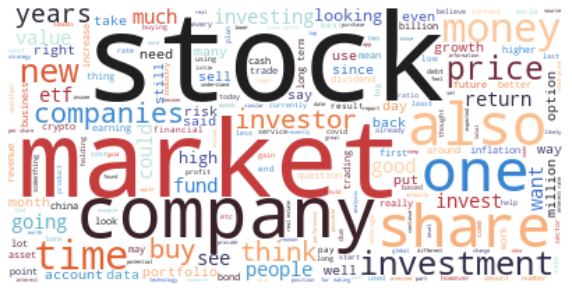

In [34]:
plt.figure(figsize=(10,6))

text_1 = ' '.join(i for i in df_cleaned.loc[df_cleaned['subreddit_investing'] == 1]['all_text'])

wordcloud_1 = WordCloud(stopwords=all_stopwords, 
                      background_color="white",
                      colormap='icefire',
                      max_words=200
                     ).generate(text_1)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis("off")
plt.show()

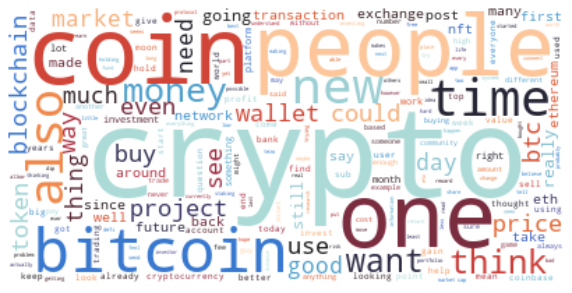

In [35]:
plt.figure(figsize=(10,6))

text_2 = ' '.join(i for i in df_cleaned.loc[df_cleaned['subreddit_investing'] == 0]['all_text'])

wordcloud_2 = WordCloud(stopwords=all_stopwords, 
                        background_color="white",
                        colormap='icefire',
                        max_words=200
                       ).generate(text_2)
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis("off")
plt.show()

### Observations

1.  several words found with large relative size to be present in both word clouds. These include the words 'time', 'new' and 'one'.
2. However, there are differences in the two word clouds. The subreddit r/investing has more focus words such as 'stock', 'company' and 'market', which are not present in the r/CryptoCurrency word cloud.
3. Similarly, some focus words found in r/CryptoCurrency such as 'bitcoin', 'blockchain' and 'people' are not found to be as large as compared to the r/investing wordcloud.
4. These focus words provide a great amount of predictive power as they suggest that the two subreddits may be able to produce a good predictive model.

## Word Count

Visualising the difference in word count for both subreddits in the graph below. The following steps are taken to create the visualization:

1. Create and apply function for word count
2. Create word count visualization

In [36]:
# Step 1: Create and apply function for word count:
def word_count(row):
    row['word_count'] = len(row['selftext'])
    return row

df_cleaned =df_cleaned.apply(word_count, axis=1)

<Figure size 432x3600 with 0 Axes>

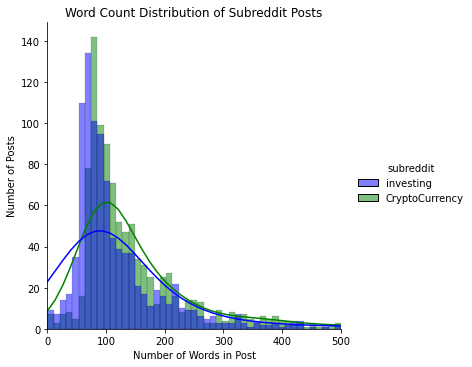

In [37]:
# Step 2: Word count visualization

plt.figure(figsize=(6,50))
sns.displot(
    x=df_cleaned['word_count'],
    hue=df_cleaned['subreddit'],
    palette=['blue', 'green'],
    bins=250,
    kde=True
);
plt.xlim(0, 500)
plt.title('Word Count Distribution of Subreddit Posts')
plt.ylabel('Number of Posts')
plt.xlabel('Number of Words in Post');

### Observations:

1. The distribution of word count have peaks at the 70-100 word range in both subreddits.
2. The high peak in the r/investing subreddit shown by the drastic increase in frequency in the (60-80) as compared to the bin before it (40-60) can be explained as a result of a minimum word count for subreddit. It appears that in most cases, reddit users who are not long-time members of or active in the subreddit is restricted by a minimum word count threshold set by the subreddit's moderators.
3. In the r/investing subreddit, the restriction in the minimum number of words used in the posts seem have incentivized posters to meet the word count.
4. Although the peak in word count in the r/CryptoCurrency subreddit is similar to the r/investing subreddit, the peaks is in the 80-90 word range in the r/CryptoCurrency subreddit.
5. The distribution is skewed right, with a very long tail. This suggests that while most posts are concise in nature, outlier posts with more word counts are also present.
6. The unnatural distribution of posts in r/investing due to the imposed minimum word count restriction seems to negatively affect the kde. As such, using a kde to predict the frequency of word count per post may not provide sufficient predictive power for future posts.


# Ngram Visualization

## Create DataFrame and Function

Prior to ngram visualization, the frequency of the top-20 unigram far exceed that of the top-20 bigrams. As such, the frequency of occurence for the top bigram is smaller than the top 20th unigram. The same is true when comparing the frequency of bigrams to trigram. Therefore, if a different value is set for minimum and maximum ngram range, the top-20 results will only be words from the minimum ngram range. Hence, we set our minimum and maximum ngram range to be equal. This way, the 1-word, 2-word, and 3-word ngrams will be obtained separately.

Below are the steps to be taken for the initial step of visualization:

1. Creating separate series' for each subreddit so that they can display the most frequent unigram, bigram and trigram for each subreddit and compare the results.
2. Create function for Count Vectorizer Visualization
3. Create function for TF-IDF Vectorizer Visualization

In [38]:
# Step 1: Create separate series for each subreddit
visual_crypto = df_cleaned.loc[df_cleaned['subreddit_investing'] == 0 , 'tok_lemma_all_text']
visual_investing = df_cleaned.loc[df_cleaned['subreddit_investing'] == 1 , 'tok_lemma_all_text']

In [39]:
# Step 2: Create function for CVEC Vectorizer Visualization
def cvec_ngram(range_value):

    # Instantiate Vectorizer
    cvec_visual = CountVectorizer(ngram_range=(range_value, range_value))
    
    # Creating dataframe based on vectorizer
    crypto_visual = cvec_visual.fit_transform(visual_crypto)
    crypto_visual_df = pd.DataFrame(crypto_visual.todense(),
                                             columns=cvec_visual.get_feature_names())
    investing_visual = cvec_visual.fit_transform(visual_investing)
    investing_visual_df = pd.DataFrame(investing_visual.todense(),
                                       columns=cvec_visual.get_feature_names())
    
    # Plotting bar graph
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    crypto_visual_df.sum().sort_values(
        ascending=False).head(20).plot(kind='barh');
    plt.title('Top 20 Word(s) in r/crypto (CVEC)')
    plt.ylabel('Word(s)')
    plt.xlabel('Frequency (CVEC)')

    plt.subplot(1, 2, 2)
    investing_visual_df.sum().sort_values(
        ascending=False).head(20).plot(kind='barh');
    plt.title('Top 20 Word(s) in r/investing (CVEC)')
    plt.ylabel('Word(s)')
    plt.xlabel('Frequency (CVEC)')
    
    plt.tight_layout()

In [40]:
# Step 3: Create function for TF-IDF Vectorizer Visualization
def tvec_ngram(range_value):

    # Instantiate Vectorizer
    tvec_visual = TfidfVectorizer(ngram_range=(range_value, range_value))
    
    # Creating dataframe based on vectorizer
    crypto_visual = tvec_visual.fit_transform(visual_crypto)
    crypto_visual_df = pd.DataFrame(crypto_visual.todense(),
                                             columns=tvec_visual.get_feature_names())
    investing_visual = tvec_visual.fit_transform(visual_investing)
    investing_visual_df = pd.DataFrame(investing_visual.todense(),
                                       columns=tvec_visual.get_feature_names())
    
    # Plotting bar graph
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    crypto_visual_df.sum().sort_values(
        ascending=False).head(20).plot(kind='barh');
    plt.title('Top 20 Word(s) in r/crypto (TVEC)')
    plt.ylabel('Word(s)')
    plt.xlabel('Frequency (TVEC)')

    plt.subplot(1, 2, 2)
    investing_visual_df.sum().sort_values(
        ascending=False).head(20).plot(kind='barh');
    plt.title('Top 20 Word(s) in r/investing (TVEC)')
    plt.ylabel('Word(s)')
    plt.xlabel('Frequency (TVEC)')
    
    plt.tight_layout()

## Unigrams

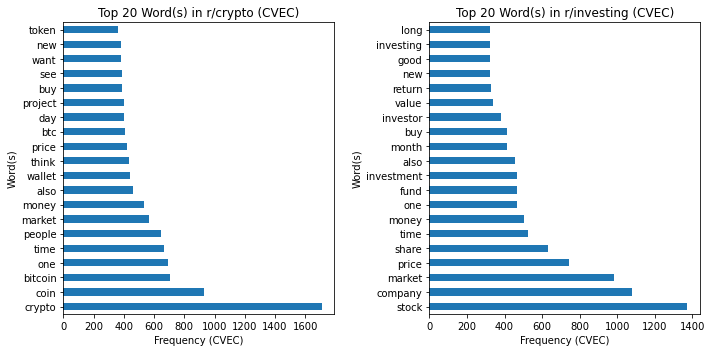

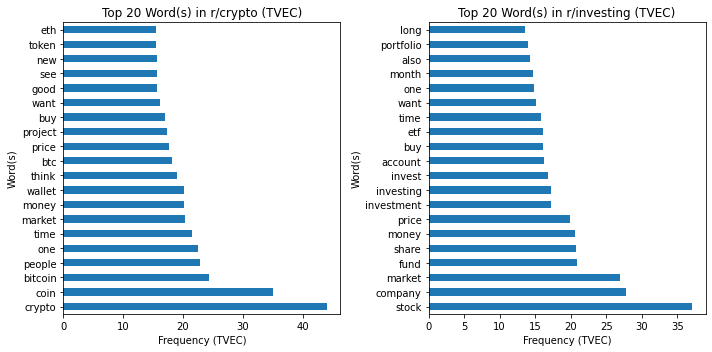

In [41]:
cvec_ngram(1)
tvec_ngram(1)


### Observations

1. 'Would' appears to be a common word in all instance of unigrams. This is most likely due to its nature as a stopword. However, we withhold dropping this word due to possible permutations in contextually.
2. 'Time' is also a common word. This suggests that in both subreddits, time is a factor of concern.
3. More notably, the two subreddits seem to have a difference in the nature of words used. In r/CryptoCurrency, it appears that there is a greater usage of words such as 'bitcoin', 'coin', and 'crypto', while in r/investing, words such as 'Company', 'Stock', and 'Market' are used.

## Bigrams

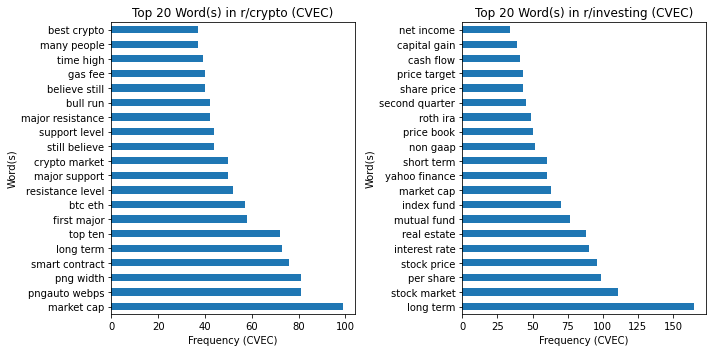

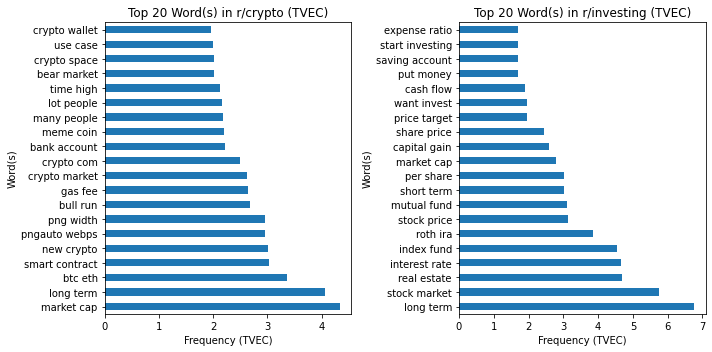

In [42]:
cvec_ngram(2)
tvec_ngram(2)

### Observations

1. 'long term' is a common popular bigram in the four graphs. This suggests that in both subreddits, time is a factor of concern.
2. Similarly, there is a distinction between the nature of the words used. The r/investing subreddit has bigarm such as 'stock market' and 'real estate', while the words useed in the r/CryptoCurrency subreddit has bigrams such as 'market cap' and 'smart contract'.
3. We note that the difference between top bigrams in the two subreddits allow for greater predictive power of our model due to its greater distinguishability.

## Trigrams

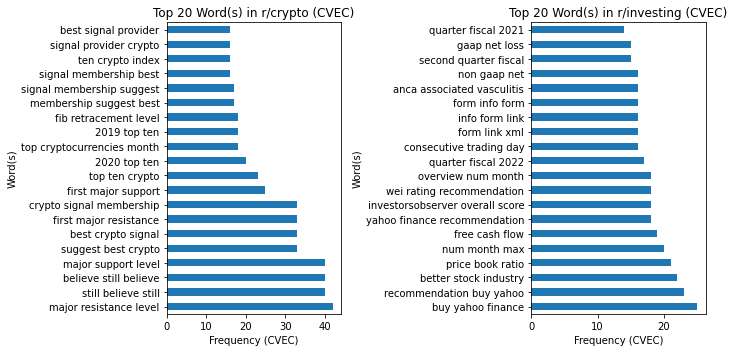

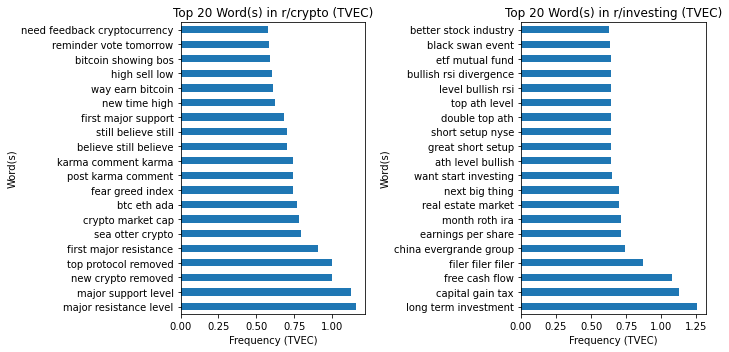

In [43]:
cvec_ngram(3)
tvec_ngram(3)

### Observations:

1. There are no major similar trigrams appearing in all four diagrams.

## Concluding Remarks for Ngram Visualization
Through the findings on  unigram, bigram and trigram visualization, among the top 20 words used, there is little similarity between the two subreddits. The large proportion of difference in ngram usage frequency suggests that the tokens will provide a significant predictive value in our model.


In [44]:
# export finalised dataset
df_cleaned.to_csv('../data/df_model.csv')